# TASK-3 (To Explore Unsupervised Machine Learning) 

PROBLEM STATEMENT - From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

# Importing Relevant Libraries

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches
import sklearn.metrics as sm
sns.set()

# Loading Dataset

In [36]:
data = pd.read_csv("C:\\Users\\Lenovo\\Downloads\\Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Data Preprocessing
# Checking For Null Values, Missing Values, Shape and Data-type 

In [37]:
data = data.drop('Id',axis=1)
data.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [38]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [40]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Visualization of Dataset

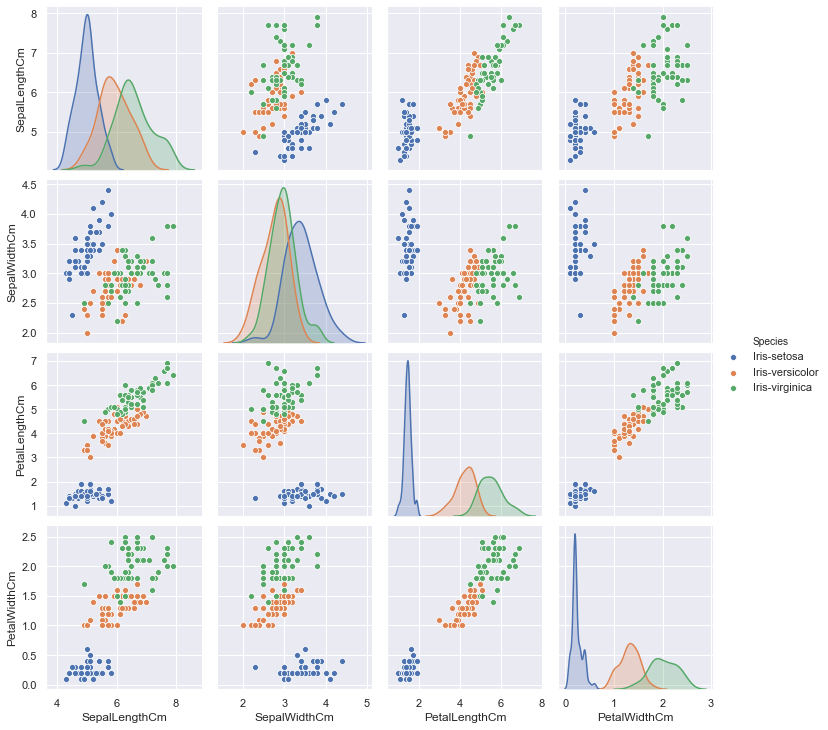

In [79]:
sns.pairplot(data,hue='Species')

# SEPAL Clustering

In [46]:
x = data.iloc[:,0:2]
x

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


# Target Cluster

In [153]:
target_cluster = data['Species'].map({'Iris-setosa':1,'Iris-versicolor':0,'Iris-virginica':2})
target_cluster

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

# Standardization of Dataset

In [71]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.90068117,  1.03205722],
       [-1.14301691, -0.1249576 ],
       [-1.38535265,  0.33784833],
       [-1.50652052,  0.10644536],
       [-1.02184904,  1.26346019],
       [-0.53717756,  1.95766909],
       [-1.50652052,  0.80065426],
       [-1.02184904,  0.80065426],
       [-1.74885626, -0.35636057],
       [-1.14301691,  0.10644536],
       [-0.53717756,  1.49486315],
       [-1.26418478,  0.80065426],
       [-1.26418478, -0.1249576 ],
       [-1.87002413, -0.1249576 ],
       [-0.05250608,  2.18907205],
       [-0.17367395,  3.11468391],
       [-0.53717756,  1.95766909],
       [-0.90068117,  1.03205722],
       [-0.17367395,  1.72626612],
       [-0.90068117,  1.72626612],
       [-0.53717756,  0.80065426],
       [-0.90068117,  1.49486315],
       [-1.50652052,  1.26346019],
       [-0.90068117,  0.56925129],
       [-1.26418478,  0.80065426],
       [-1.02184904, -0.1249576 ],
       [-1.02184904,  0.80065426],
       [-0.7795133 ,  1.03205722],
       [-0.7795133 ,

# Elbow-Method 
(TO FIND OPTIMAL NUMBER OF CLUSTERS)

In [57]:
wcss = []
for i in range (1,7):
    kmeans_sepal = KMeans(i)
    kmeans_sepal.fit(x_scaled)
    wcss_iter = kmeans_sepal.inertia_
    wcss.append(wcss_iter)
wcss    

[300.0,
 168.39262198361087,
 103.78443895265738,
 79.78313895418405,
 61.763287316926274,
 52.54396008337227]

Text(0, 0.5, 'WCSS')

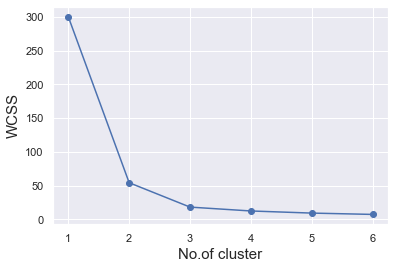

In [178]:
plt.plot(range(1,7),wcss,marker="o")
plt.xlabel('No.of cluster',size=15)
plt.ylabel('WCSS',size=15)

AS WE CAN SEE THAT AFTER 3rd CLUSTER THERE IS NO IMPROVEMENT. SO,OPTIMAL NUMBER OF CLUSTERS ARE 3. 

# K-Means Clustering (SEPAL)

In [67]:
kmeans_sepal = KMeans(3)
kmeans_sepal.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [154]:
data_with_cluster = x.copy()
data_with_cluster['clusters'] = kmeans_sepal.fit_predict(x_scaled)
data_with_cluster['actual_species'] = target_cluster
data_with_cluster

,SepalLengthCm,SepalWidthCm,clusters,actual_species
0,5.1,3.5,1,1
1,4.9,3.0,1,1
2,4.7,3.2,1,1
3,4.6,3.1,1,1
4,5.0,3.6,1,1
...,...,...,...,...
145,6.7,3.0,2,2
146,6.3,2.5,0,2
147,6.5,3.0,2,2
148,6.2,3.4,2,2


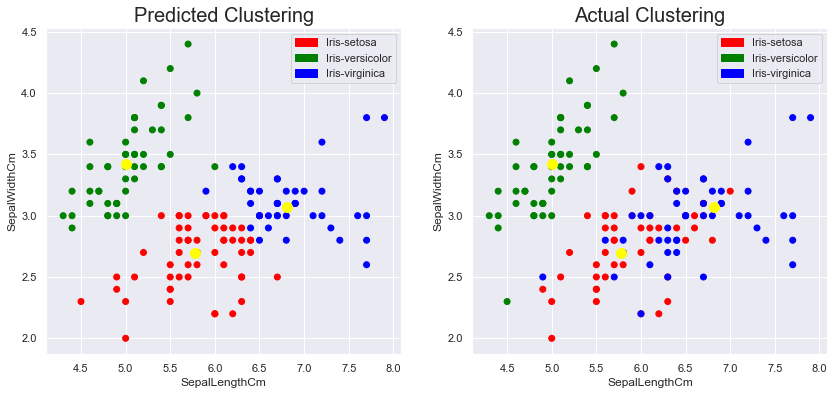

In [206]:
plt.figure(figsize=(14,6))
colors = np.array(['red', 'green', 'blue'])
iris_targets_legend = np.array(['Iris-setosa','Iris-versicolor','Iris-virginica'])
red_patch = mpatches.Patch(color='red', label='Iris-setosa')
green_patch = mpatches.Patch(color='green', label='Iris-versicolor')
blue_patch = mpatches.Patch(color='blue', label='Iris-virginica')
plt.subplot(1,2,1)
plt.scatter(data_with_cluster['SepalLengthCm'],data_with_cluster['SepalWidthCm'],c=colors[data_with_cluster['clusters']])
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend(handles=[red_patch, green_patch, blue_patch])
plt.title('Predicted Clustering',size=20)
plt.scatter(kmeans_sepal.fit(x).cluster_centers_[:, 0], kmeans_sepal.fit(x).cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.subplot(1,2,2)
plt.scatter(data_with_cluster['SepalLengthCm'],data_with_cluster['SepalWidthCm'],c=colors[data_with_cluster['actual_species']])
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend(handles=[red_patch, green_patch, blue_patch])
plt.title('Actual Clustering',size=20)
plt.scatter(kmeans_sepal.fit(x).cluster_centers_[:, 0], kmeans_sepal.fit(x).cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

# Accuracy of the Model (Sepal)

In [218]:
sm.confusion_matrix(data_with_cluster['clusters'], data_with_cluster['actual_species'])

array([[36,  1, 20],
       [ 1, 49,  0],
       [13,  0, 30]], dtype=int64)

In [219]:
sm.accuracy_score(data_with_cluster['clusters'], data_with_cluster['actual_species'])

0.7666666666666667

# Petal Clustering

In [161]:
y = data.iloc[:,2:4]
y

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


# Standardization of Dataset

In [183]:
from sklearn import preprocessing
y_scaled = preprocessing.scale(y)
y_scaled

array([[-1.34127240e+00, -1.31297673e+00],
       [-1.34127240e+00, -1.31297673e+00],
       [-1.39813811e+00, -1.31297673e+00],
       [-1.28440670e+00, -1.31297673e+00],
       [-1.34127240e+00, -1.31297673e+00],
       [-1.17067529e+00, -1.05003079e+00],
       [-1.34127240e+00, -1.18150376e+00],
       [-1.28440670e+00, -1.31297673e+00],
       [-1.34127240e+00, -1.31297673e+00],
       [-1.28440670e+00, -1.44444970e+00],
       [-1.28440670e+00, -1.31297673e+00],
       [-1.22754100e+00, -1.31297673e+00],
       [-1.34127240e+00, -1.44444970e+00],
       [-1.51186952e+00, -1.44444970e+00],
       [-1.45500381e+00, -1.31297673e+00],
       [-1.28440670e+00, -1.05003079e+00],
       [-1.39813811e+00, -1.05003079e+00],
       [-1.34127240e+00, -1.18150376e+00],
       [-1.17067529e+00, -1.18150376e+00],
       [-1.28440670e+00, -1.18150376e+00],
       [-1.17067529e+00, -1.31297673e+00],
       [-1.28440670e+00, -1.05003079e+00],
       [-1.56873522e+00, -1.31297673e+00],
       [-1.

# Elbow-Method
TO FIND THE OPTIMAL NUMBER OF CLUSTERS

In [163]:
wcss = []
for i in range (1,7):
    kmeans_petal = KMeans(i)
    kmeans_petal.fit(y_scaled)
    wcss_iter = kmeans_petal.inertia_
    wcss.append(wcss_iter)
wcss

[300.0,
 54.145847013449895,
 18.046983891906272,
 12.307440251261845,
 9.17531574000775,
 7.210310805349153]

Text(0, 0.5, 'WCSS')

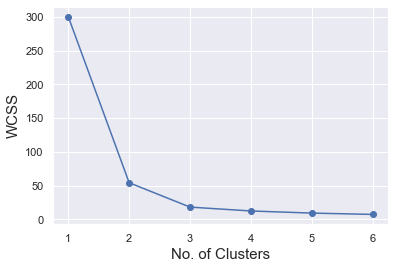

In [179]:
plt.plot(range(1,7),wcss,marker="o")
plt.xlabel('No. of Clusters',size=15)
plt.ylabel('WCSS',size=15)

AS WE CAN SEE THAT AFTER 3rd CLUSTER THERE IS NO IMPROVEMENT. SO,OPTIMAL NUMBER OF CLUSTERS ARE 3. 

# K-Means Clusering (PETAL)

In [165]:
kmeans_petal = KMeans(3)
kmeans_petal.fit(y_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [166]:
data_with_cluster2 = y.copy()
data_with_cluster2['clusters'] = kmeans_petal.fit_predict(y_scaled)
data_with_cluster2['actual_species'] = target_cluster
data_with_cluster2

,PetalLengthCm,PetalWidthCm,clusters,actual_species
0,1.4,0.2,1,1
1,1.4,0.2,1,1
2,1.3,0.2,1,1
3,1.5,0.2,1,1
4,1.4,0.2,1,1
...,...,...,...,...
145,5.2,2.3,2,2
146,5.0,1.9,2,2
147,5.2,2.0,2,2
148,5.4,2.3,2,2


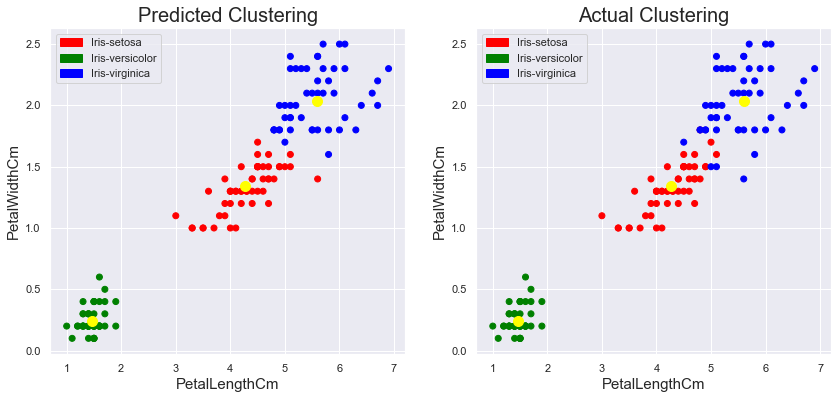

In [209]:
plt.figure(figsize=(14,6))
colors = np.array(['red', 'green', 'blue'])
iris_targets_legend = np.array(['Iris-setosa','Iris-versicolor','Iris-virginica'])
red_patch = mpatches.Patch(color='red', label='Iris-setosa')
green_patch = mpatches.Patch(color='green', label='Iris-versicolor')
blue_patch = mpatches.Patch(color='blue', label='Iris-virginica')
plt.subplot(1,2,1)
plt.scatter(data_with_cluster2['PetalLengthCm'],data_with_cluster2['PetalWidthCm'],c=colors[data_with_cluster2['clusters']])
plt.xlabel('PetalLengthCm',size=15)
plt.ylabel('PetalWidthCm',size=15)
plt.legend(handles=[red_patch, green_patch, blue_patch])
plt.title('Predicted Clustering',size=20)
plt.scatter(kmeans_petal.fit(y).cluster_centers_[:, 0], kmeans_petal.fit(y).cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.subplot(1,2,2)
plt.scatter(data_with_cluster2['PetalLengthCm'],data_with_cluster2['PetalWidthCm'],c=colors[data_with_cluster2['actual_species']])
plt.xlabel('PetalLengthCm',size=15)
plt.ylabel('PetalWidthCm',size=15)
plt.legend(handles=[red_patch, green_patch, blue_patch])
plt.title('Actual Clustering',size=20)
plt.scatter(kmeans_petal.fit(y).cluster_centers_[:, 0], kmeans_petal.fit(y).cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

# Accuracy of the model (Petal)

In [216]:
sm.confusion_matrix(data_with_cluster2['clusters'], data_with_cluster2['actual_species'])

array([[48,  0,  4],
       [ 0, 50,  0],
       [ 2,  0, 46]], dtype=int64)

In [217]:
sm.accuracy_score(data_with_cluster2['clusters'], data_with_cluster2['actual_species'])

0.96